In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('./data/arch_benchmark/results.csv')
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing
0,yolov8s,11137922,28.657715,0.003874,115.614319,2.568238
1,yolov8s-p2,10638536,36.969011,0.003521,160.532150,2.848303
2,yolov8s-p234,7410434,34.383258,0.004122,162.149589,2.845483
3,yolov8s-p2-c2fsum,9819336,34.662144,0.003729,152.715282,2.468119
4,yolov8s-p2-hyb,4985392,20.725862,0.003285,118.668554,2.670989


In [27]:
# COMPUTE FPS/Latency
df['Latency'] = df['Preprocessing'] + df['Postprocessing'] + df['Inference']
df['FPS'] = 1000/df['Latency']
df.sort_values(by='FPS', ascending=False, inplace=True)
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing,Latency,FPS
0,yolov8s,11137922,28.657715,0.003874,115.614319,2.568238,118.186431,8.461208
4,yolov8s-p2-hyb,4985392,20.725862,0.003285,118.668554,2.670989,121.342828,8.241113
3,yolov8s-p2-c2fsum,9819336,34.662144,0.003729,152.715282,2.468119,155.187130,6.443833
1,yolov8s-p2,10638536,36.969011,0.003521,160.532150,2.848303,163.383975,6.120551
2,yolov8s-p234,7410434,34.383258,0.004122,162.149589,2.845483,164.999194,6.060636


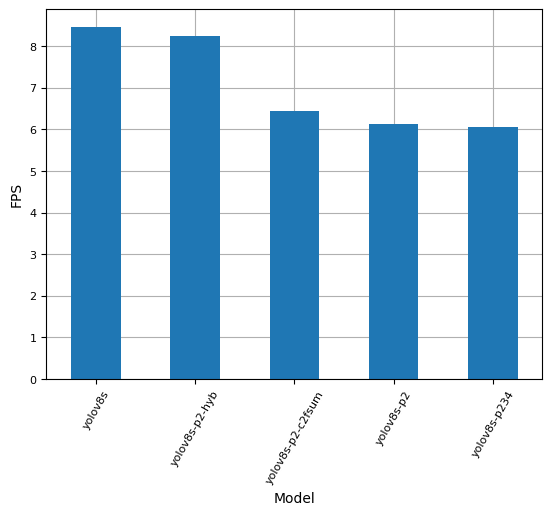

In [28]:
df.plot.bar(y='FPS', x='Model', rot=60, yticks=np.arange(0, np.ceil(df['FPS'].max()), 1), grid=True, zorder=2, legend=False, ylabel='FPS', fontsize=8)
None

In [29]:
df.sort_values(by='Inference', ascending=True, inplace=True)
df

,Model,Parameters,GFLOPs,Preprocessing,Inference,Postprocessing,Latency,FPS
0,yolov8s,11137922,28.657715,0.003874,115.614319,2.568238,118.186431,8.461208
4,yolov8s-p2-hyb,4985392,20.725862,0.003285,118.668554,2.670989,121.342828,8.241113
3,yolov8s-p2-c2fsum,9819336,34.662144,0.003729,152.715282,2.468119,155.187130,6.443833
1,yolov8s-p2,10638536,36.969011,0.003521,160.532150,2.848303,163.383975,6.120551
2,yolov8s-p234,7410434,34.383258,0.004122,162.149589,2.845483,164.999194,6.060636


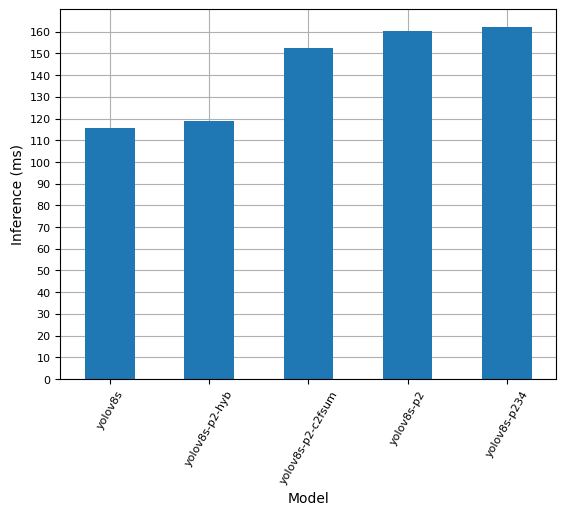

In [30]:
df.plot.bar(y='Inference', x='Model', rot=60, yticks=np.arange(0, np.ceil(df['Inference'].max()), 10), grid=True, zorder=2, legend=False, ylabel='Inference (ms)', fontsize=8)
None